# Exploratory data analysis

In [2]:
import numpy as np
import os
import csv

In [3]:
dir_path = os.getcwd()

points = np.genfromtxt(dir_path+ "/../DATA/marie-knorps.csv", delimiter=',')


In [4]:
print("min y:", points[:,1].min(), "\nmax y: ", points[:,1].max())
print("mean x: {}, mean y: {}".format(np.mean(points[:,0]),np.mean(points[:,1])))
print("Number of points: {}".format(len(points)))
np.percentile(points[:,1],(5,50,95))

min y: -16244627390.50994 
max y:  14853023497.624878
mean x: -0.08627066585529655, mean y: -126816023.25503203
Number of points: 10000


array([-9.51854610e+09, -9.68467606e+01,  8.50816460e+09])

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

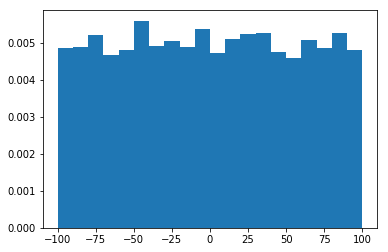

In [6]:
_ = plt.hist(points[:,0],bins=20, normed=True)

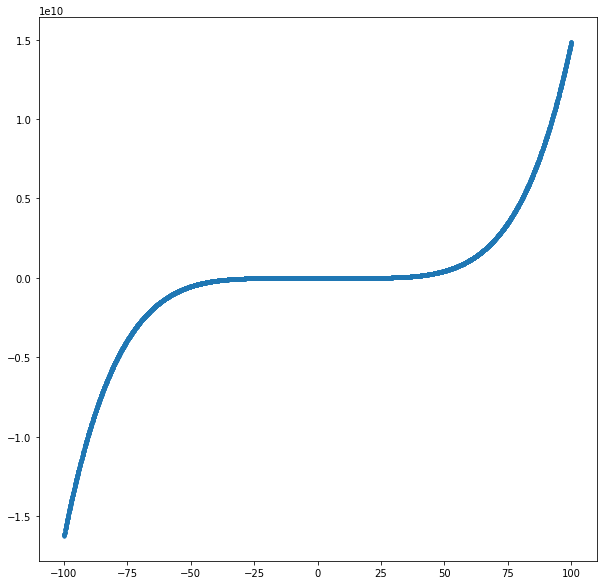

In [7]:
plt.figure(figsize=(10,10))
plt.plot(points[:,0], points[:,1], linestyle='none', marker='.')

## Let's see what theoretical polynomial would be a good fit

In [8]:
# 1st order polynomial
fit1 = np.polyfit(points[:,0], points[:,1], deg=1)
fit2 = np.polyfit(points[:,0], points[:,1], deg=2)

# 3rd order polynomial
fit3 = np.polyfit(points[:,0], points[:,1], deg=3)
fit5 = np.polyfit(points[:,0], points[:,1], deg=5)
fit7 = np.polyfit(points[:,0], points[:,1], deg=7)

In [9]:
def polynomial(fitn):
    def pol(x):
        n=len(fitn)
        value = sum([v*x**(n-i-1) for i,v in enumerate(fitn)])
        return value
    return pol

In [10]:
print(polynomial(fit1)(1))

-54730447.34710026


In [17]:
x = np.arange(-100,100)
y1= [polynomial(fit1)(v) for v in x]
y2= [polynomial(fit2)(v) for v in x]
y3= [polynomial(fit3)(v) for v in x]
y5= [polynomial(fit5)(v) for v in x]
y7= [polynomial(fit7)(v) for v in x]

my_fit = [polynomial([ 50 -1.92047919e+04,  3.83396681e+09, -1.01869659e+08])(v) for v in x]

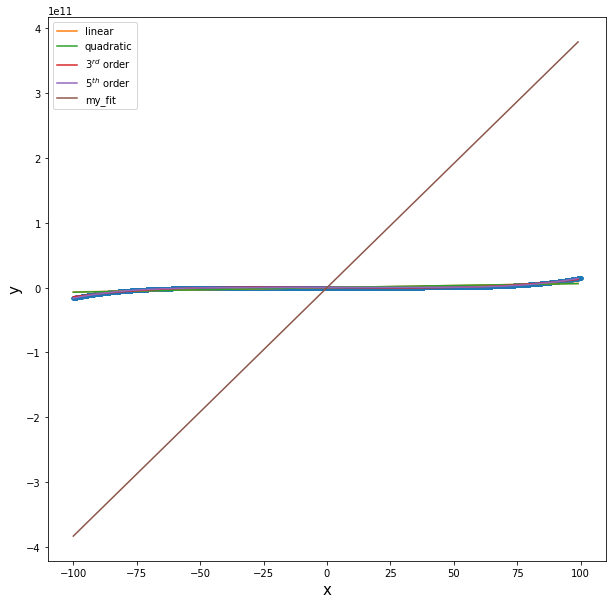

In [18]:
plt.figure(figsize=(10,10))
plt.plot(points[:,0], points[:,1], linestyle='none', marker='.')
plt.plot(x,y1, label='linear')
plt.plot(x,y2, label='quadratic')
plt.plot(x,y3, label='$3^{rd}$ order')
plt.plot(x,y5, label='$5^{th}$ order')
plt.plot(x,my_fit, label='my_fit')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()
plt.savefig('data.png')